<a href="https://colab.research.google.com/github/anniechen0506/Machine-Learning-Fall-2023/blob/main/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 2: Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

# Caravan Insurance Application

In this assignment, I look at the `Caravan` insurance dataset that includes 85 predictors that measure demographic characteristics for 5,822 individuals and "Purchase," which indicates whether or not a given individual purchases a caravan insurance policy.


In [2]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 337 (delta 122), reused 123 (delta 76), pack-reused 117
Receiving objects: 100% (337/337), 27.13 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Updating files: 100% (53/53), done.


In [3]:
Caravan = pd.read_csv('ML_656/Caravan.csv', index_col=0)

## Data Exploration

In [4]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


Variables 1-43 represent sociodemographic data, variables 44-86 describe product ownership, and Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy.


In [5]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


Here I want to check how many people purchase insurance:

In [6]:
Caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

So only roughly 6% of all people buy caravan insurance.  That will be costly for an insurance agent because for every client she or he visits, only 6 in 100 will purchase insurance.  

Here I would like to use classification to help out the sales force, and try to determine individuals (based on their characteristics) that are more likely to purchase a policy.

## Predictive Modeling

Let's split into a training and test set to get going

In [7]:
Train, Test = train_test_split(Caravan, test_size=0.25, random_state=1)

In [8]:
X_train = Train.drop(['Purchase'], axis=1)
y_train = Train['Purchase']
X_test = Test.drop(['Purchase'], axis=1)
y_test = Test['Purchase']

Start with a vanilla logistic regression model:

In [9]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train,y_train)
y_pred_logistic = logistic_model.predict(X_test)

Then I look at the confusion matrix resulting from our predictions:

In [10]:
confusion_matrix(y_test, y_pred_logistic)

array([[1369,    4],
       [  83,    0]])

I evaluate the AUC, where I first have to convert the predictions to probabilities:

In [11]:
y_pred_logistic = logistic_model.predict_proba(X_test)
def Extract(lst):
    return [item[0] for item in lst]
y_pred_logistic = Extract(y_pred_logistic)

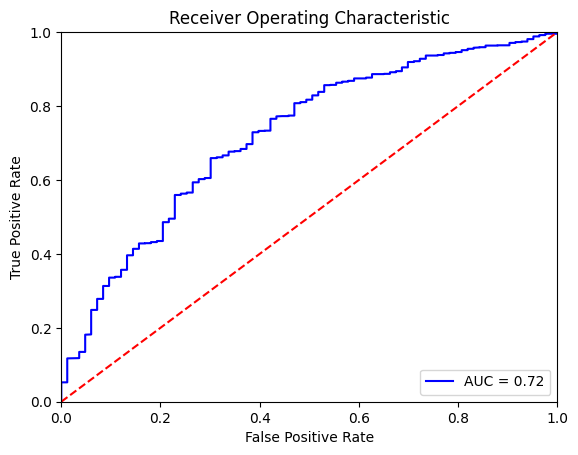

In [12]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_logistic)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Check LDA:

In [13]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
np.sum(y_pred_LDA == 'Yes')

19

So it looks like we get a few positives. Let's check confusion matrix and AUC:

In [14]:
confusion_matrix(y_test, y_pred_LDA)

array([[1360,   13],
       [  77,    6]])

In [15]:
y_pred_LDA = LDA_model.predict_proba(X_test)
y_pred_LDA = Extract(y_pred_LDA)

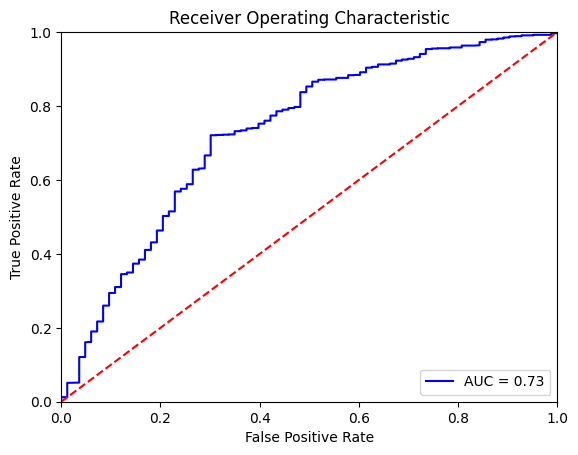

In [16]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_LDA)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So a bit of an improvement.

I compare these results to an L1-regularized logistic regression -- a.k.a. LASSO logistic regression -- to see if that yields an improvement.  After all, there are many features so possibily selection is important:

In [17]:
lassolog_model = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=2000)  # or 'liblinear'
lassolog_model.fit(X_train, y_train)
y_pred_lassolog = lassolog_model.predict(X_test)

Let's evaluate the predictions:

In [18]:
confusion_matrix(y_test, y_pred_lassolog)

array([[1370,    3],
       [  83,    0]])

Let's try to tune the model a bit better:

In [ ]:
C = [50, 10, 1, .1, 0.05,.01,.001]
for c in C:
  lassologcv_model = LogisticRegression(penalty='l1',C=c,class_weight = 'balanced',solver='liblinear',max_iter=2000)
  scores = cross_val_score(lassologcv_model, X_train, y_train, cv=5, scoring="f1_micro")
  print(scores)
  print(np.mean(scores))

Let's evaluate predictions:

In [ ]:
lassologcv_model = LogisticRegression(penalty='l1',C=50,class_weight = 'balanced',solver='liblinear',max_iter=2000)
lassologcv_model.fit(X_train, y_train)
y_pred_lassologcv = lassologcv_model.predict(X_test)
confusion_matrix(y_test, y_pred_lassologcv)

And check the AUC again:

In [ ]:
y_pred_lassologcv = lassologcv_model.predict_proba(X_test)
y_pred_lassologcv = Extract(y_pred_lassologcv)

In [ ]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_lassologcv)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

No substantial improvement. So it looks like here selecting variables doesn't make a huge difference. Possibly more advanced learners that can spot relevant interactions will perform better.